In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [35]:
df = pd.read_csv('creditcard.csv')

In [36]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [37]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [38]:
# df.isnull().sum().to_string()

In [39]:
mean = df['V1'].mean()
std_dev = df['V1'].std()

In [40]:
df['Z_score'] = (df['V1'] - mean) / std_dev


In [41]:
threshold = 3

In [42]:
outliers = df[df['Z_score'].abs() > threshold]

In [43]:
print("Outliers detected using Z-score method:")
print(outliers)

Outliers detected using Z-score method:
            Time         V1         V2         V3        V4         V5  \
164        103.0  -6.093248 -12.114213  -5.694973  3.294389  -1.413792   
1158       905.0  -6.169664   6.118940  -1.667775 -1.206991  -0.021373   
1632      1264.0 -11.140706  -9.612726 -12.389545  6.013346 -32.092129   
2464      2029.0 -12.168192 -15.732974  -0.376474  3.792613  10.658654   
2682      2223.0  -7.546256   3.051033  -0.524684  1.005228   0.040486   
...          ...        ...        ...        ...       ...        ...   
284561  172558.0  -6.491016   5.700607  -6.421237 -0.971126  -2.902874   
284649  172642.0 -11.946976   9.772660  -8.006237 -2.498596  -4.229520   
284772  172760.0  -6.713826   2.369104  -3.534768 -0.368259  -1.721030   
284795  172778.0 -12.516732  10.187818  -8.476671 -2.510473  -4.586669   
284802  172786.0 -11.881118  10.071785  -9.834783 -2.066656  -5.364473   

               V6         V7         V8        V9  ...       V22       

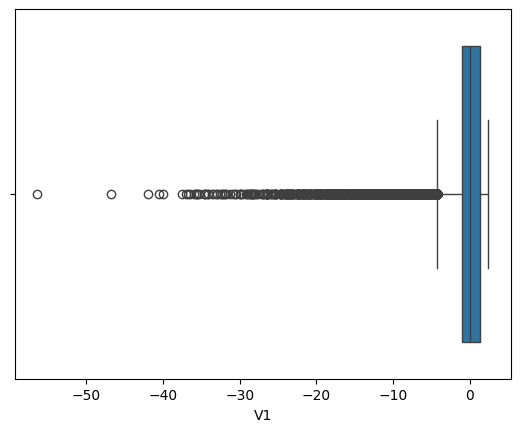

In [44]:
sns.boxplot(x=df['V1'])
plt.show()

In [45]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Z_score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.694241
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.608495
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.693499
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.493324
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.591329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,-6.065831
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,-0.374121
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,0.980022
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,-0.122755


In [46]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [47]:
model = KMeans(n_clusters=2, random_state=42)

In [48]:
model.fit(df)

KMeans(n_clusters=2, random_state=42)

In [49]:
distances = model.transform(df)
cluster_distances = distances.min(axis=1)

threshold = cluster_distances.mean() + 3 * cluster_distances.std()
outliers = df[cluster_distances > threshold]

In [51]:
outliers

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Z_score
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,-0.694241
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.608495
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,-0.693499
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,-0.493324
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.591329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4619,3982.0,1.073763,0.036388,1.621854,1.625471,-0.996757,0.001693,-0.726418,0.120653,2.156495,...,0.042819,0.103309,0.539597,0.242888,-0.450165,0.062032,0.033611,9.99,0,0.548203
4620,3983.0,-2.020571,0.753420,0.354435,-0.466388,-2.618328,-0.565957,-2.140716,1.725857,-0.105187,...,1.240906,0.100345,0.474599,-0.889085,-0.198454,-0.668703,-0.168120,29.95,0,-1.031590
4621,3986.0,-0.917484,1.377484,1.338240,0.891680,0.014935,-0.198796,0.080857,0.477323,0.357096,...,-0.109484,-0.151568,-0.067842,0.015970,-0.419214,0.222861,0.086976,8.52,0,-0.468416
4622,3989.0,-4.077689,1.171922,-2.256165,-0.086509,1.217896,3.444430,-1.200452,1.330527,0.614737,...,-1.088911,-0.131206,0.937078,-0.110037,-0.796209,-1.687310,-0.721744,9.82,0,-2.081839


In [57]:
df.isnull().sum().unique()

array([0], dtype=int64)